In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
from sklearn import datasets
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['Result'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Result
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [262]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
Result    float64
dtype: object

In [264]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Result
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


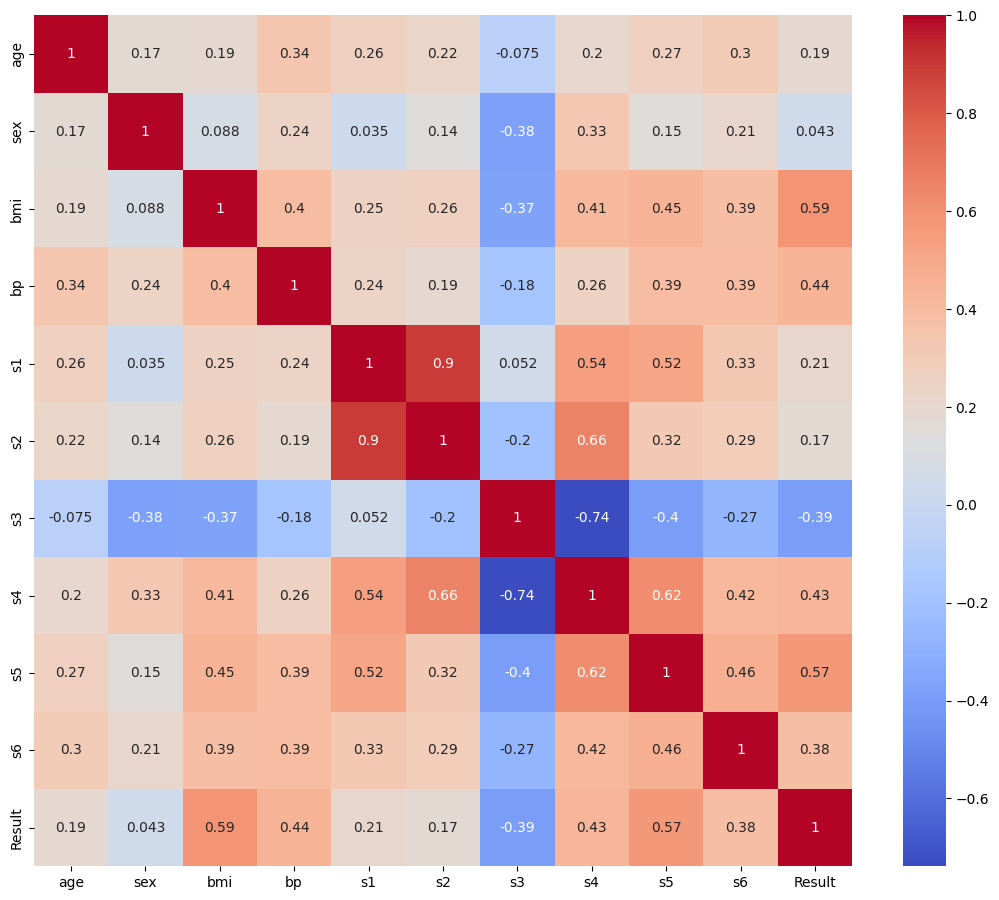

In [265]:
import seaborn as sns

plt.figure(figsize=(len(df.columns) * 1.2, len(df) * 0.025))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

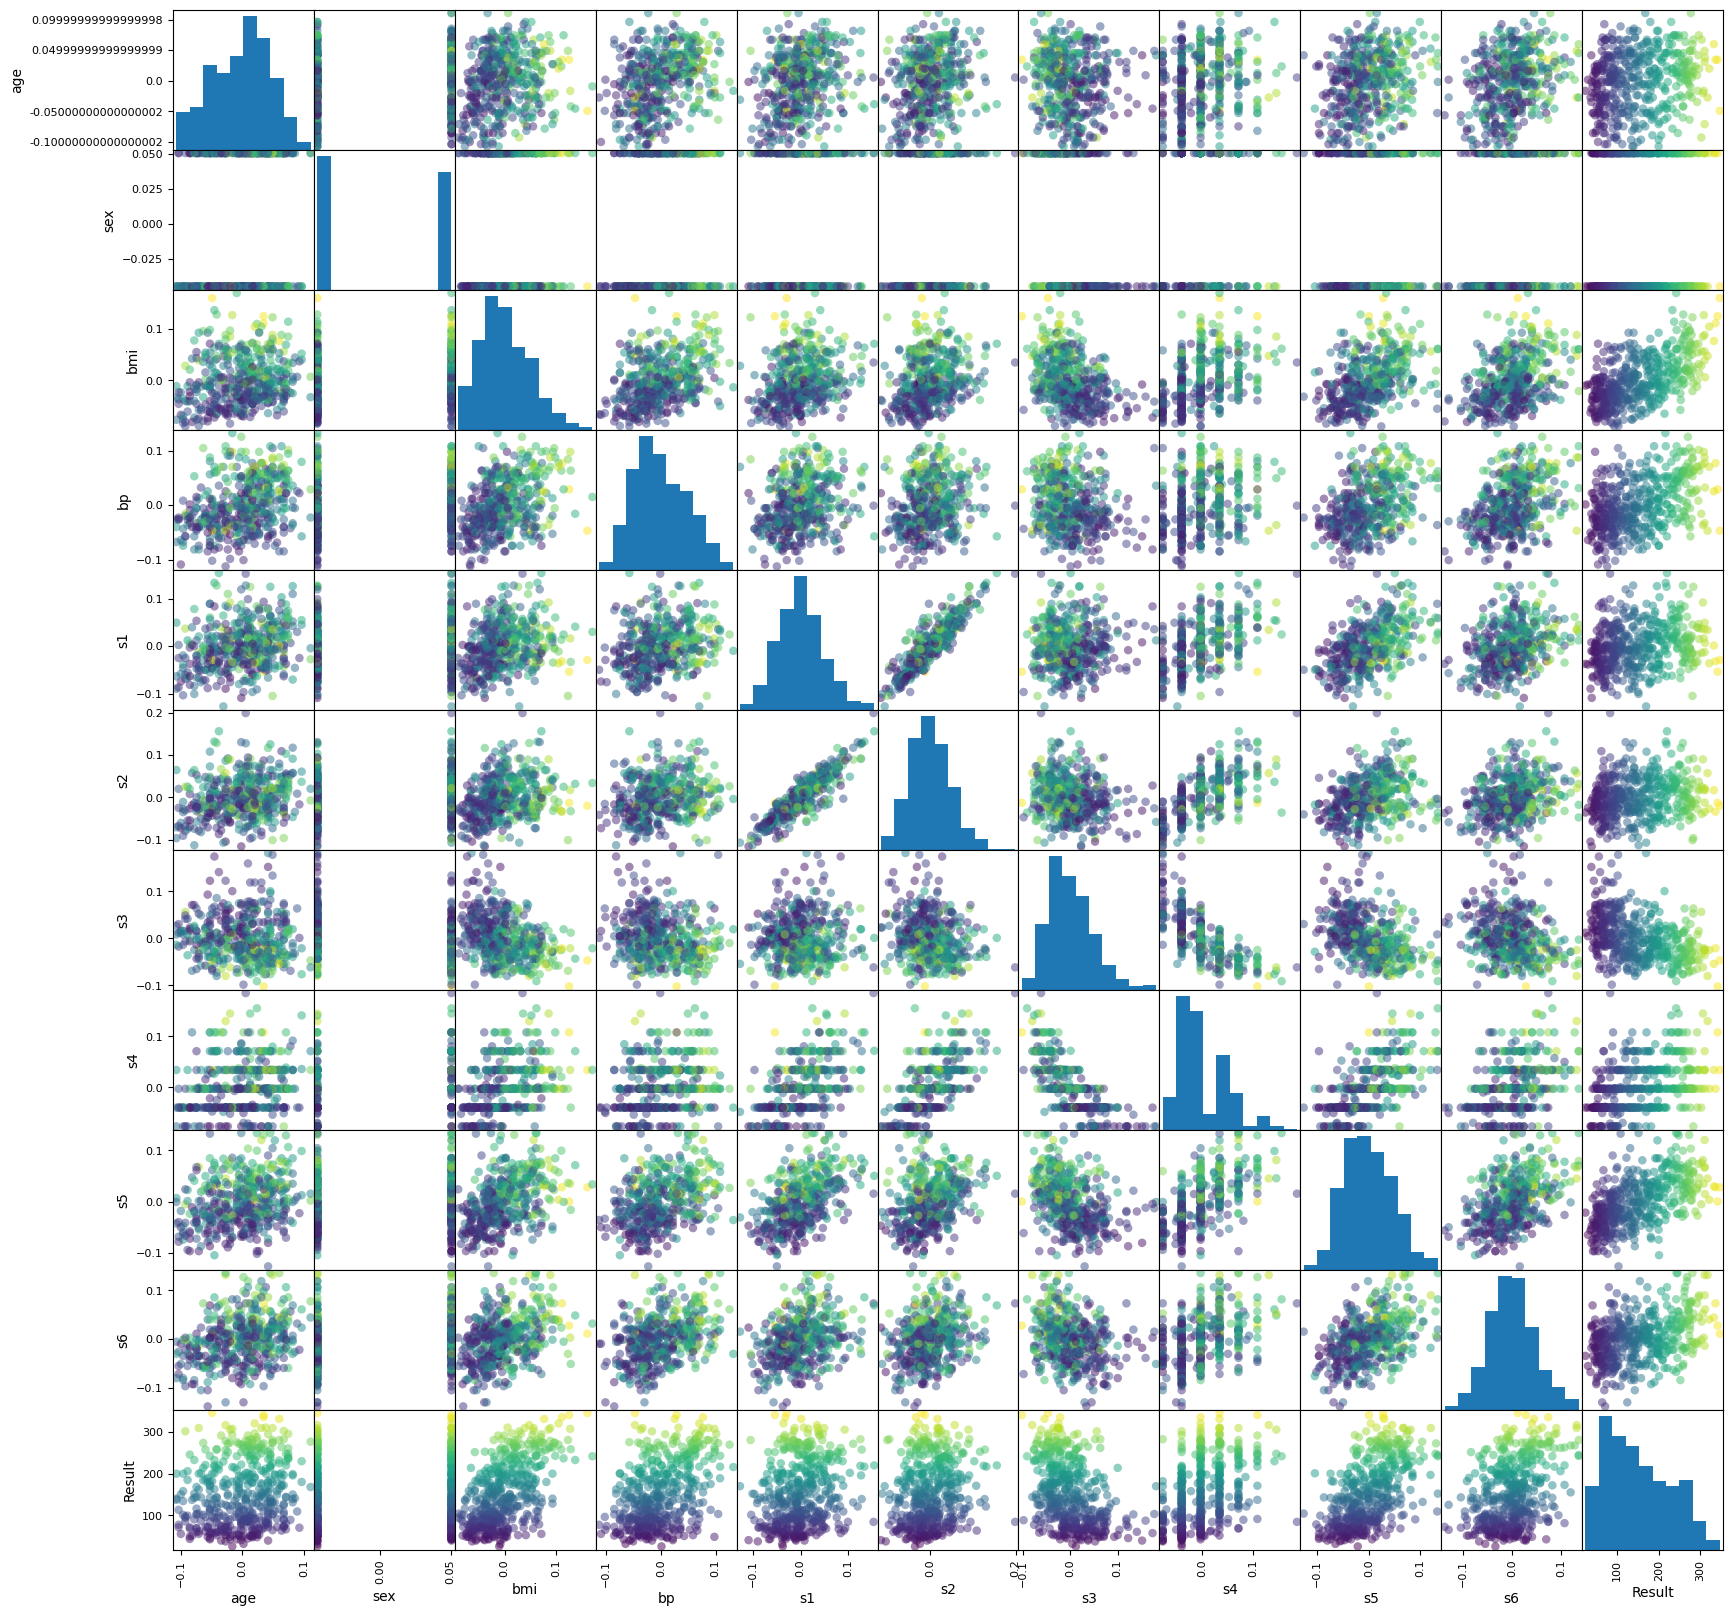

In [266]:
pd.plotting.scatter_matrix(df, c=diabetes.target, figsize=[20, 20], s=150)
plt.show()

<h1>Regularization Regression</h1>

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes.data
y = diabetes.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Linear Regression

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

y_pred_lr = lr_model.predict(X_scaled)

mse_lr = mean_squared_error(y, y_pred_lr)
r2_lr = r2_score(y, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression MSE: 2859.69634758675
Linear Regression R²: 0.5177484222203499


In [272]:
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression MSE: 2900.1936284934827
Linear Regression R²: 0.45260276297191926


Lasso Regression

Lasso Regression MSE: 2861.903916631677
Lasso Regression R²: 0.5173761436545252
[ -0.27769342 -11.15948797  24.85518378  15.2421328  -26.44813964
  13.72566329  -0.           7.05557447  31.57506171   3.1584765 ]


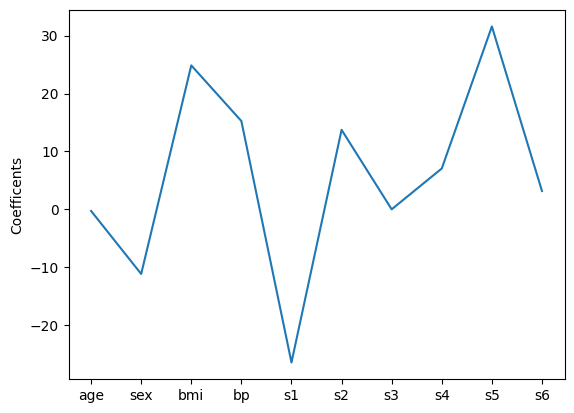

In [273]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_scaled, y)

y_pred_lasso = lasso_model.predict(X_scaled)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R²:", r2_lasso)

lasso_coef = lasso_model.coef_
print(lasso_coef)

plt.plot(range(10), lasso_coef)
plt.xticks(range(10), diabetes.feature_names)
plt.ylabel('Coefficents')
plt.show()

In [274]:
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R²:", r2_lasso)

Lasso Regression MSE: 2884.553106763631
Lasso Regression R²: 0.4555548342738087


Ridge Regression

Ridge Regression MSE: 2886.1693096489234
Ridge Regression R²: 0.5132840923855555
[ -0.          -9.31941253  24.83127631  14.08870568  -4.83892808
  -0.         -10.62279919   0.          24.42081057   2.56212987]


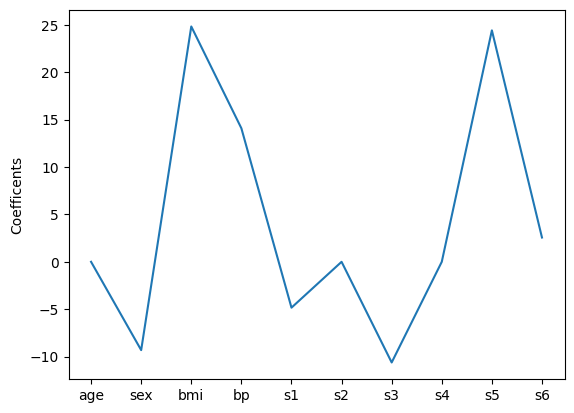

In [275]:
from sklearn.linear_model import Ridge

ridge_model = Lasso(alpha=1.0)  
ridge_model.fit(X_scaled, y)

y_pred_ridge = ridge_model.predict(X_scaled)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R²:", r2_ridge)

ridge_coef = ridge_model.coef_
print(ridge_coef)

plt.plot(range(10), ridge_coef)
plt.xticks(range(10), diabetes.feature_names)
plt.ylabel('Coefficents')
plt.show()

In [276]:
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R²:", r2_ridge)

Ridge Regression MSE: 2824.100750671931
Ridge Regression R²: 0.4669649181976272


ElasticNet Regression

ElasticNet Regression MSE: 5319.171493525776
ElasticNet Regression R²: 0.10298908225061898
[ 10.28633208   0.28598338  37.46465473  27.54476518  11.10885591
   8.3558916  -24.12080871  25.50549197  35.46569979  22.89498509]


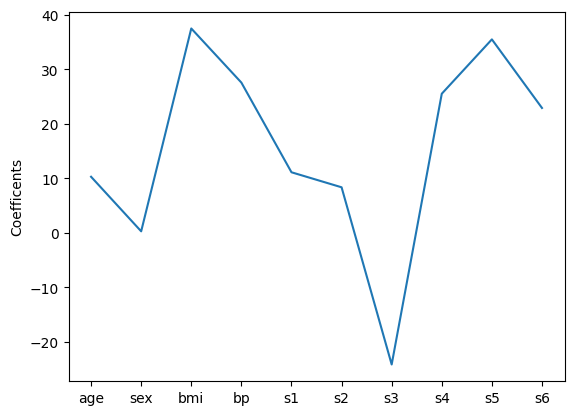

In [277]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_model.fit(X, y)

y_pred_elastic = elastic_model.predict(X)
mse_elastic = mean_squared_error(y, y_pred_elastic)
r2_elastic = r2_score(y, y_pred_elastic)

print("ElasticNet Regression MSE:", mse_elastic)
print("ElasticNet Regression R²:", r2_elastic)

EN_coef = elastic_model.coef_
print(EN_coef)

plt.plot(range(10), EN_coef)
plt.xticks(range(10), diabetes.feature_names)
plt.ylabel('Coefficents')
plt.show()

In [278]:
elastic_model.fit(X_train, y_train)

y_pred_elastic = elastic_model.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("ElasticNet Regression MSE:", mse_elastic)
print("ElasticNet Regression R²:", r2_elastic)

ElasticNet Regression MSE: 2866.197078803244
ElasticNet Regression R²: 0.4590194439776599


<h4>Other models to achieve a better R2 score</h4>

SGD

ElasticNet Regression MSE: 2884.4524422877284
ElasticNet Regression R²: 0.4555738341969293
[  2.01012851 -11.3683114   26.51176118  16.47680046  -6.0447379
  -4.66170233 -10.28473304   6.52887228  20.6797854    2.64643462]


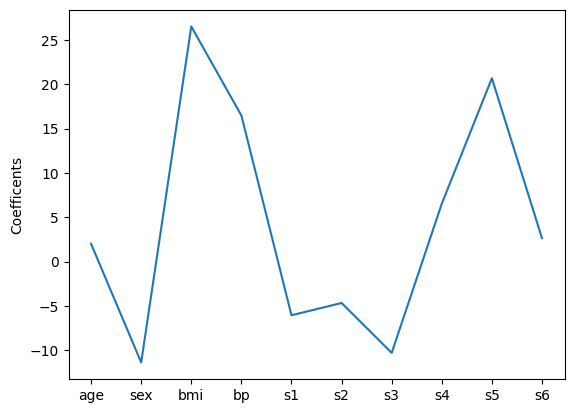

In [286]:
from sklearn.linear_model import SGDRegressor

SGD = SGDRegressor(random_state=42)
SGD.fit(X_train, y_train)

y_pred_sgd = SGD.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
print("ElasticNet Regression MSE:", mse_sgd)
print("ElasticNet Regression R²:", r2_sgd)

SGD_coef = SGD.coef_
print(SGD_coef)

plt.plot(range(10), SGD_coef)
plt.xticks(range(10), diabetes.feature_names)
plt.ylabel('Coefficents')
plt.show()

Random Forest Regressor

Random Forest MSE: 2963.013847191012
Random Forest R²: 0.44074575666493343
  Feature  Importance
2     bmi    0.355469
8      s5    0.230957
3      bp    0.088408
9      s6    0.071329
0     age    0.058642
5      s2    0.057227
4      s1    0.052784
6      s3    0.051339
7      s4    0.024213
1     sex    0.009633


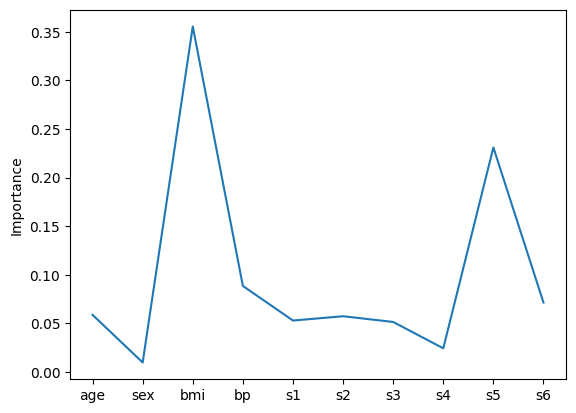

In [279]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R²:", r2_rf)


feature_importance = pd.DataFrame({
    'Feature':  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
    'Importance': rf_model.feature_importances_
})
print(feature_importance.sort_values(by='Importance', ascending=False))

RF_importances = rf_model.feature_importances_

plt.plot(range(10), RF_importances)
plt.xticks(range(10), diabetes.feature_names)
plt.ylabel('Importance')
plt.show()

SVR

In [280]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR MSE:", mse_svr)
print("SVR R²:", r2_svr)

SVR MSE: 2938.461928646995
SVR R²: 0.4453798101442229


KNeighbors Regressor

In [281]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNeighbors MSE:", mse_knn)
print("KNeighbors R²:", r2_knn)

KNeighbors MSE: 3019.075505617978
KNeighbors R²: 0.43016439526042805


Polynomial

In [282]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

best_degree = 0
best_score = float('-inf')
degrees = range(1, 5) 

for degree in degrees:

    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_degree = degree

print(f"Best Degree: {best_degree}")
print(f"Best R² Score: {best_score}")

Best Degree: 1
Best R² Score: 0.44925647412212166


In [283]:
poly = PolynomialFeatures(degree=best_degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [284]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [285]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R² score (Train): {r2_train}")
print(f"R² score (Test): {r2_test}")

R² score (Train): 0.5279193863361498
R² score (Test): 0.4526027629719195


Gradient Boosting Regressor

In [287]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting MSE:", mse_gbr)
print("Gradient Boosting R²:", r2_gbr)

Gradient Boosting MSE: 2912.4425073842135
Gradient Boosting R²: 0.45029084752061865


XGB Regressor

In [288]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MSE:", mse_xgb)
print("XGBoost R²:", r2_xgb)

XGBoost MSE: 2959.455813706508
XGBoost R²: 0.44141731792882144


<h2>Classification</h2>

In [300]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cdf = df.copy()

In [301]:
conditions = [
    (cdf['Result'] <= 50),
    (cdf['Result'] > 50) & (df['Result'] <= 200),
    (cdf['Result'] > 200)
]
choices = [0, 1, 2]
cdf['Result_category'] = np.select(conditions, choices)

In [302]:
y = cdf['Result_category']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [309]:
def run_classification_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

In [310]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
run_classification_model(knn, X_train, X_test, y_train, y_test)

Model: KNeighborsClassifier
Accuracy: 0.7415730337078652
Confusion Matrix:
 [[ 0  4  0]
 [ 0 58  4]
 [ 0 15  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.94      0.83        62
           2       0.67      0.35      0.46        23

    accuracy                           0.74        89
   macro avg       0.47      0.43      0.43        89
weighted avg       0.70      0.74      0.70        89



c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [311]:
# 2. Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
run_classification_model(decision_tree, X_train, X_test, y_train, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.7078651685393258
Confusion Matrix:
 [[ 0  4  0]
 [ 5 50  7]
 [ 1  9 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.79      0.81      0.80        62
           2       0.65      0.57      0.60        23

    accuracy                           0.71        89
   macro avg       0.48      0.46      0.47        89
weighted avg       0.72      0.71      0.71        89



In [312]:
# 3. Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
run_classification_model(logistic_regression, X_train, X_test, y_train, y_test)

Model: LogisticRegression
Accuracy: 0.8089887640449438
Confusion Matrix:
 [[ 0  4  0]
 [ 0 59  3]
 [ 0 10 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.81      0.95      0.87        62
           2       0.81      0.57      0.67        23

    accuracy                           0.81        89
   macro avg       0.54      0.51      0.51        89
weighted avg       0.77      0.81      0.78        89



c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [313]:
# 4. Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
run_classification_model(svm, X_train, X_test, y_train, y_test)

Model: SVC
Accuracy: 0.7865168539325843
Confusion Matrix:
 [[ 0  4  0]
 [ 0 61  1]
 [ 0 14  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.77      0.98      0.87        62
           2       0.90      0.39      0.55        23

    accuracy                           0.79        89
   macro avg       0.56      0.46      0.47        89
weighted avg       0.77      0.79      0.74        89



c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera